### Note
- this code is also showing entry fields for EGradients and Grad for analysis, but I couldn't properly train models using those methods, so some accuracy values are missing in the statistics below

In [1]:
%matplotlib inline
import os
from os.path import join as oj
import sys, time
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.precision', 3)

In [2]:
save_path = "../results_for_export"
trained_model_folder = '../models/ColorMNIST_test'
# trained_model_folder = '../models/ColorMNIST'
fnames = [oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 

In [3]:
results['acc_dev'] = [max(x) for x in results['accs_dev']] 
results['acc_train'] = [max(x) for x in results['accs_train']]


In [4]:
results.reset_index(drop=True, inplace=True)
results_save = results[['regularizer_rate', 'acc_train' ,'acc_dev','acc_test', 'method', 'dataset']].sort_values(by = ['regularizer_rate'])

In [5]:
concise_results = results_save.groupby(by = ['dataset', 'method','regularizer_rate']).mean()
# concise_results.columns = ['Train accuracy','Dev accuracy', 'Test accuracy', ]
concise_results

acc_train  acc_dev  acc_test
dataset method     regularizer_rate                              
Color   CDEP       0.0                 100.000    0.181     0.215
                   500.0                97.630   22.150    21.656
                   1000.0               95.638   23.916    23.221
                   5000.0               83.821   29.737    29.644
        EGradients 0.0                 100.000    0.117     0.000
        Grad       0.0                 100.000    0.117     0.000

c:\Users\Hannes\anaconda3\envs\CDEP2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hannes\anaconda3\envs\CDEP2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hannes\anaconda3\envs\CDEP2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hannes\anaconda3\envs\CDEP2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

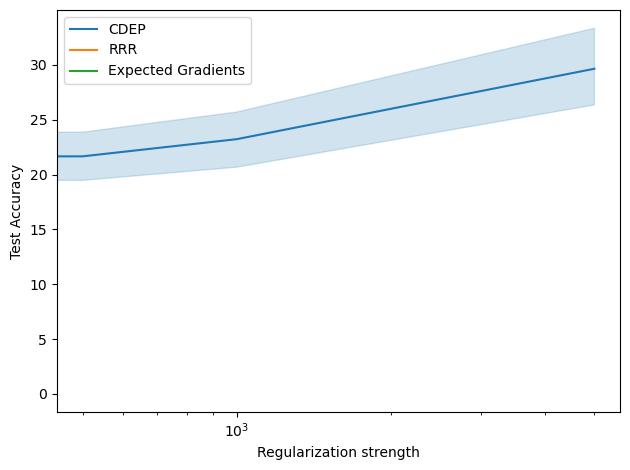

In [6]:
plot = sns.lineplot(x ='regularizer_rate' , y='acc_test', data = results_save[results_save.method == 'CDEP'],label="CDEP",legend = "brief"  );
plot = sns.lineplot(x ='regularizer_rate' , y='acc_test', data = results_save[results_save.method == 'Grad'], label="RRR" );
plot = sns.lineplot(x ='regularizer_rate' , y='acc_test', data = results_save[results_save.method == 'ExpectedGrad'], label="Expected Gradients");
plot = sns.lineplot(x ='regularizer_rate' , y='acc_test', data = results_save[results_save.method == 'EGradients'], label="Expected Gradients");
plot.set(xscale="log")
plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("");
fig  = plot.get_figure()
fig.tight_layout()
# fig.savefig(oj(save_path,"ColorMNIST_results"))
plt.show()